# Statistical Inference on PM2.5 Concentrations in China from 2013 to 2015

## Authors: Tsun Li Nicholas Tam, Camila Dall Bello, Leon Zhang

## Group: 46

## 1. Introduction
### 1.1. Background Information
From 2010 to 2013, substantial parts of China have suffered from chronic air pollution. The main pollutants are PM2.5, otherwise known as particulate matter, referring to tiny particles in the air with aerodynamic diameters of $2.5$ micrometers ($2.5 \mu m$) or less. PM2.5 consists of a complex mixture of solids and aerosols, with particles containing various organic and inorganic compounds. (Inhalable Particulate Matter and Health (PM2.5 and PM10)) 

The presence of high concentrations of PM2.5 in China has negatively influenced the climate, visibility, and human health, with the most notable case being the Eastern China smog outbreak in December 2013, where PM2.5 levels reached as high as $507$ micrograms per cubic metre ($507 \mu g/m^3$). (Con Gen ShanghaiAir, 2013) In 2013, in an attempt to reduce air pollution, the Chinese government issued the 2013-2017 Clear Air Action Plan, aiming to significantly reduce the concentrations of PM2.5 in China by 2017. (Andrews-Speed, P., Shobert., B. A., Zhidong, L., &amp; Herberg, M. E., 2015)

### 1.2. Dataset and Project Question
For our research project, we have selected datasets of hourly observations of PM2.5 concentration from 1-1-2013 to 12-31-2015. These datasets were retrieved from the [PM2.5 Data of Five Chinese Cities Data Set](https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities) from UCI machine learning repository, and converted from a singular RAR file to CSV files online. The datasets contain PM2.5 data in Beijing, Shanghai, Guangzhou, Chengdu and Shenyang, along with other meteorological data for each city, from 2013 to 2015.

Our project question is: 
#### "Given the sample data for cities in China, is there a significant decrease in PM2.5 concentration in the cities in China between 2013 and 2015?" 

Given the project question, let $\mu_{2013}$ be the mean PM2.5 concentration in 2013, $\mu_{2015}$ be the mean PM2.5 concentration in 2015, $\sigma_{2013}$ be the standard deviation of the PM2.5 concentration in 2013, and $\sigma_{2015}$ be the standard deviation of the PM2.5 concentration in 2015, with all values measured in $g/m^3$. The following hypothesis tests will be conducted: 

Hypothesis test 1:
$$H_0: \mu_{2013} = \mu_{2015}$$ 
$$H_1: \mu_{2013} > \mu_{2015}$$

Hypothesis test 2:
$$H_0: \sigma_{2013} = \sigma_{2015}$$ 
$$H_1: \sigma_{2013} \neq \sigma_{2015}$$

<!-- Generalisations based on sample -->
<!-- Differences in locations -->

<!-- $\bar{X}_1 - \bar{X}_2$ -->

## 2. Preliminary Results

### 2.1. Loading relevant libraries

In [1]:
# Imports

# install.packages("infer") # Install infer package for use

library(dplyr) # Data manipulation operations
library(gridExtra) # Extensions for grid system
library(tidyverse) # Better presentation of data
library(repr) # String and binary representations of objects for several formats / mime types 
library(digest) 
library(lubridate) # Easier date organisation
library(infer) # Bootstrap distribution, confidence interval
# library(cowplot) # Add-on to gg-plot


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.0
✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### 2.2. Uploading and merging relevant tables

- Since there were multiple datasets to be used, it is decided to read each data set separately, then merge them into a single dataframe called `total_PM2.5_AV`. 
- Before merging, two new columns are created:
    - `location`, to indicate the differing cities in China 
    - `date`, to indicate the date for each recorded value, using the `year`, `month` and `day` columns from the initial datasets
- Each of the original datasets contains values for PM2.5 concentrations in 3 separate locations per hour. For the sake of simplicity, the values have been averaged together into a single column, `PM_2.5_AV`, for each location.

In [2]:
# Preparing URLs
beijing_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/BeijingPM20100101_20151231.csv")
shanghai_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ShanghaiPM20100101_20151231.csv")
chengdu_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ChengduPM20100101_20151231.csv")
guangzhou_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/GuangzhouPM20100101_20151231.csv")
shenyang_PM2.5 <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-201-Group-46-Project/main/Data%20Sets/ShenyangPM20100101_20151231.csv")

# Preparing datasets
beijing_PM2.5_AV <- beijing_PM2.5 %>% 
    filter(!is.na(PM_Dongsi), !is.na(PM_Dongsihuan), !is.na(PM_Nongzhanguan)) %>% 
    mutate(PM_2.5_AV = (PM_Dongsi + PM_Dongsihuan + PM_Nongzhanguan) / 3) %>% 
    mutate(location = "Beijing") %>% 
    select(location, year, PM_2.5_AV) 
# head(beijing_PM2.5_AV)

shanghai_PM2.5_AV <- shanghai_PM2.5 %>% 
    filter(!is.na(PM_Jingan), !is.na(PM_US.Post), !is.na(PM_Xuhui)) %>% 
    mutate(PM_2.5_AV = (PM_Jingan + PM_US.Post + PM_Xuhui) / 3) %>% 
    mutate(location = "Shanghai") %>% 
    select(location, year, PM_2.5_AV)
# head(shanghai_PM2.5_AV)

chengdu_PM2.5_AV <- chengdu_PM2.5 %>% 
    filter(!is.na(PM_Caotangsi), !is.na(PM_Shahepu), !is.na(PM_US.Post)) %>% 
    mutate(PM_2.5_AV = (PM_Caotangsi + PM_Shahepu + PM_US.Post) / 3) %>% 
    mutate(location = "Chengdu") %>% 
    select(location, year, PM_2.5_AV)
# head(chengdu_PM2.5_AV)

guangzhou_PM2.5_AV <- guangzhou_PM2.5 %>% 
    filter(!is.na(PM_City.Station), !is.na(PM_5th.Middle.School), !is.na(PM_US.Post)) %>% 
    mutate(PM_2.5_AV = (PM_City.Station + PM_5th.Middle.School + PM_US.Post) / 3) %>% 
    mutate(location = "Guangzhou") %>% 
    select(location, year, PM_2.5_AV)
# head(guangzhou_PM2.5_AV)

shenyang_PM2.5_AV <- shenyang_PM2.5 %>% 
    filter(!is.na(PM_Taiyuanjie), !is.na(PM_US.Post), !is.na(PM_Xiaoheyan)) %>% 
    mutate(PM_2.5_AV = (PM_Taiyuanjie + PM_US.Post + PM_Xiaoheyan) / 3) %>% 
    mutate(location = "Shenyang") %>% 
    select(location, year, PM_2.5_AV)
# head(shenyang_PM2.5_AV)

# Merging datasets
total_PM2.5_AV <- rbind(beijing_PM2.5_AV, shanghai_PM2.5_AV, chengdu_PM2.5_AV, guangzhou_PM2.5_AV, shenyang_PM2.5_AV) 

head(total_PM2.5_AV)

,location,year,PM_2.5_AV
,<chr>,<int>,<dbl>
1,Beijing,2013,141.0000
2,Beijing,2013,149.3333
3,Beijing,2013,147.3333
4,Beijing,2013,118.0000
5,Beijing,2013,113.6667
6,Beijing,2013,173.3333


### 2.3. Exploratory Data Analysis

#### 2.3.1. Distribution of PM 2.5 concentrations
- The histograms below display the sample distribution of PM 2.5 concentrations in each city for 2013 and 2015. 
- Outlier values that exceed $250 \mu g/m^3$ have been omitted to allow a clearer display of the sample distribution.
- The majority of the distributions are skewed to the right.
- The distributions for Beijing in 2013 and Guangzhou in 2015 are multimodal, while the remaining distributions are unimodal.

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”
Warning message:
“Removed 768 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 599 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 11 rows containing missing values (`geom_bar()`).”


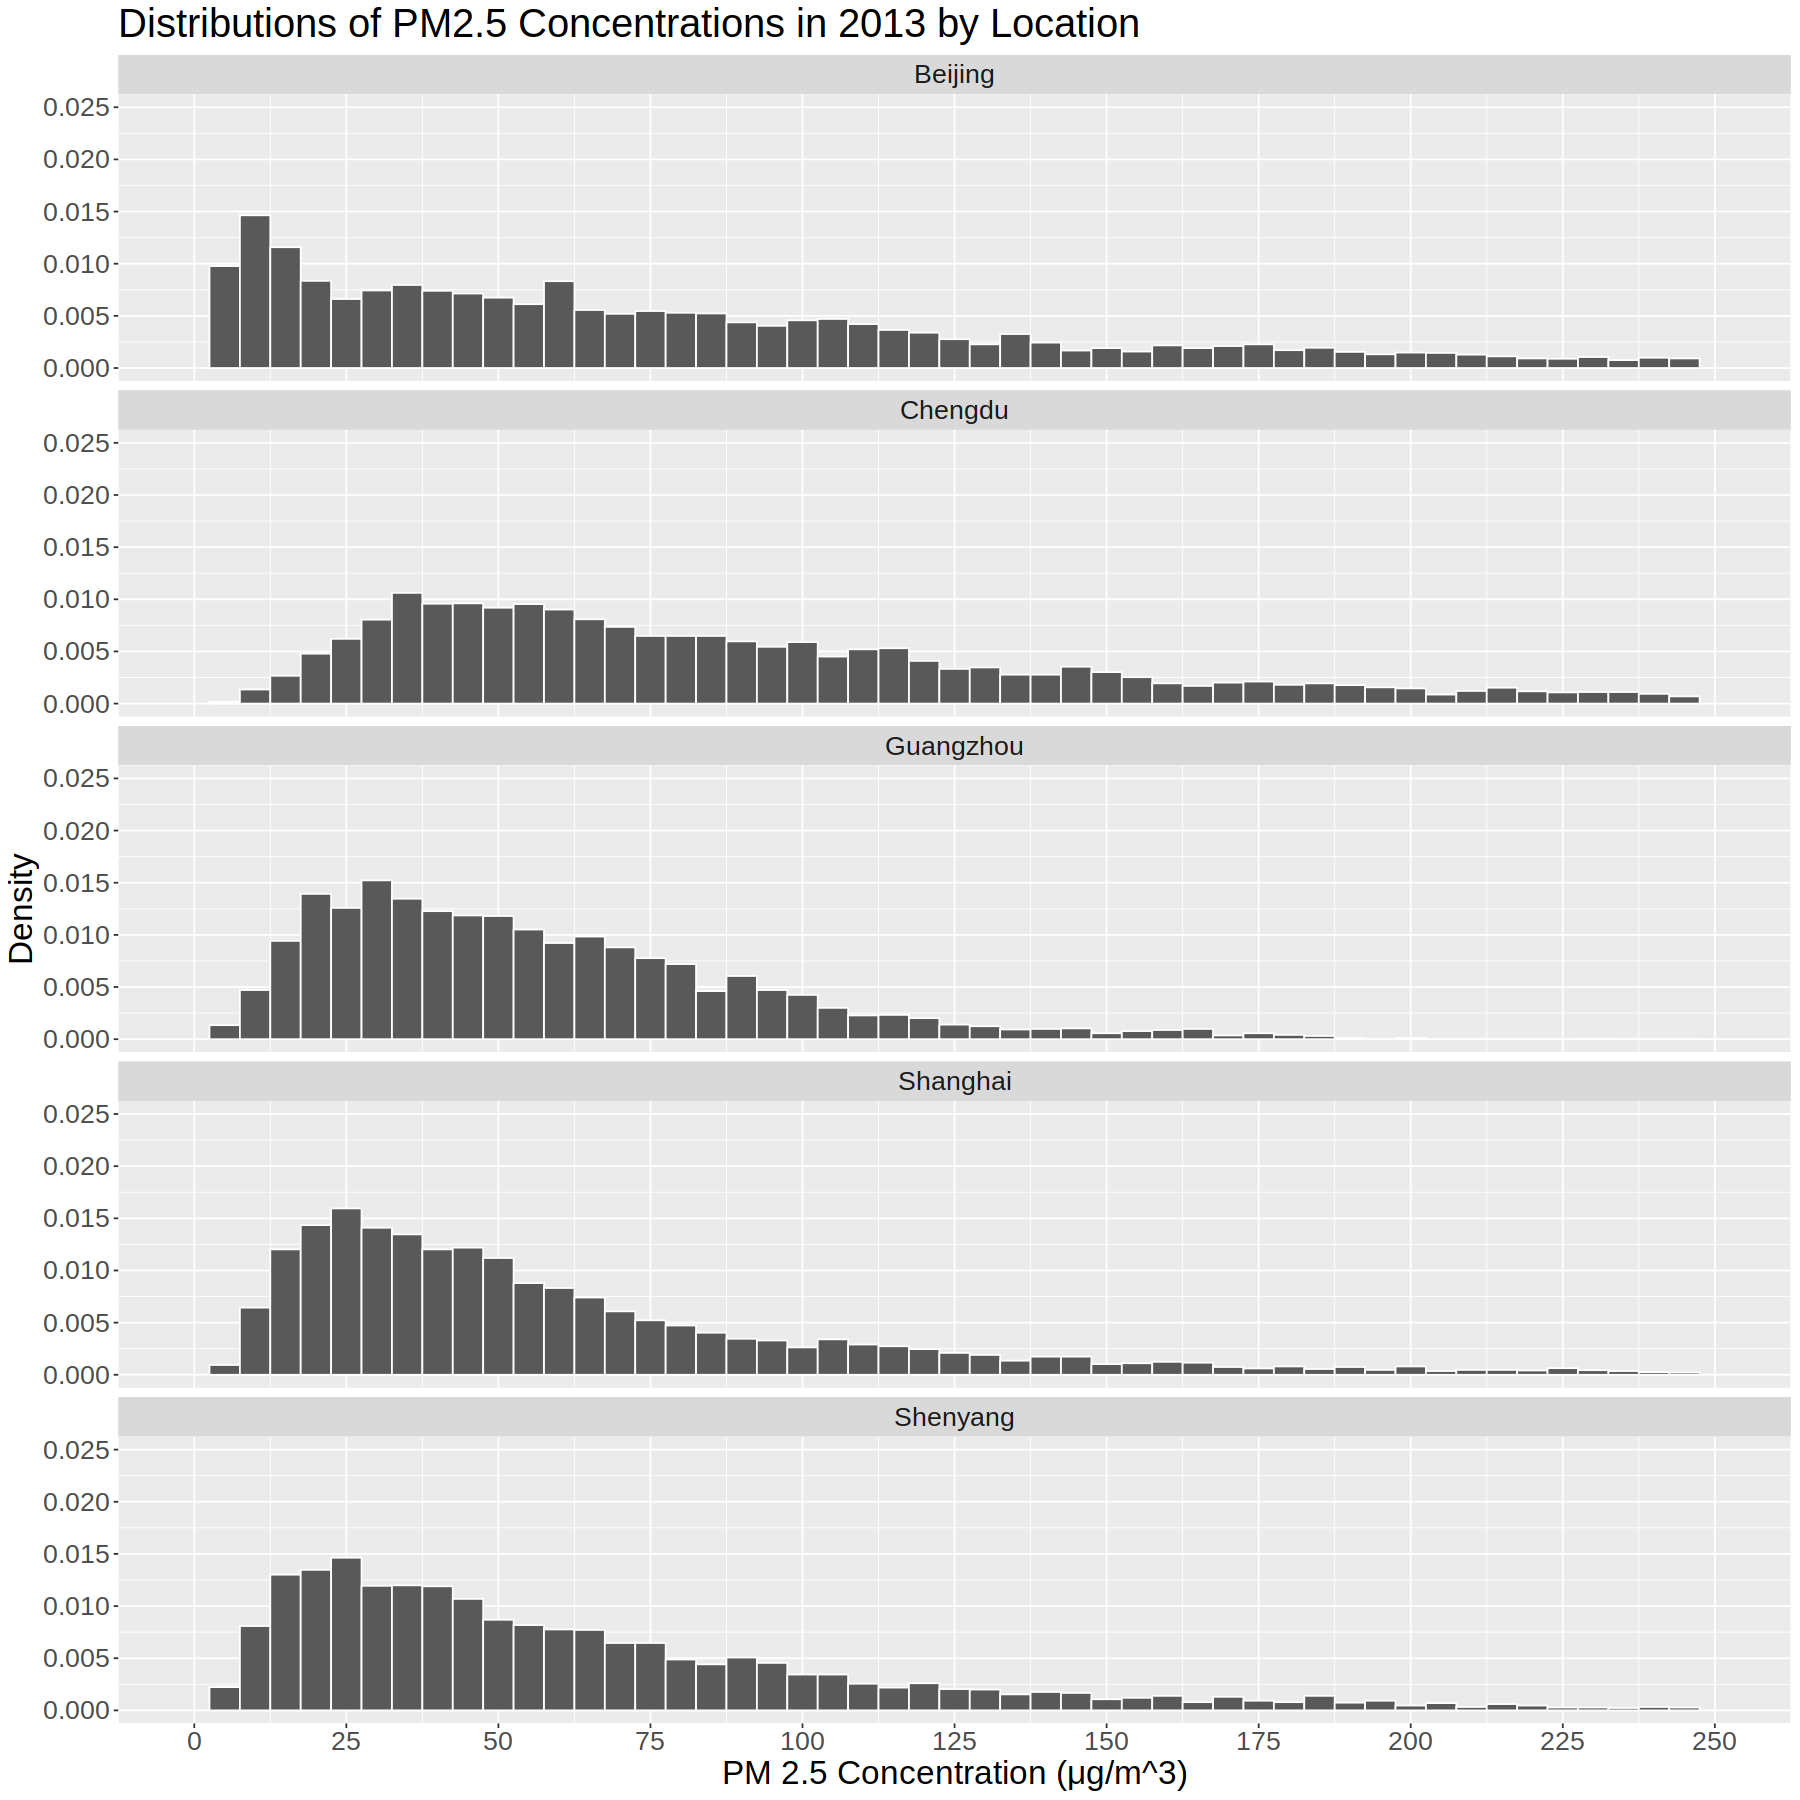

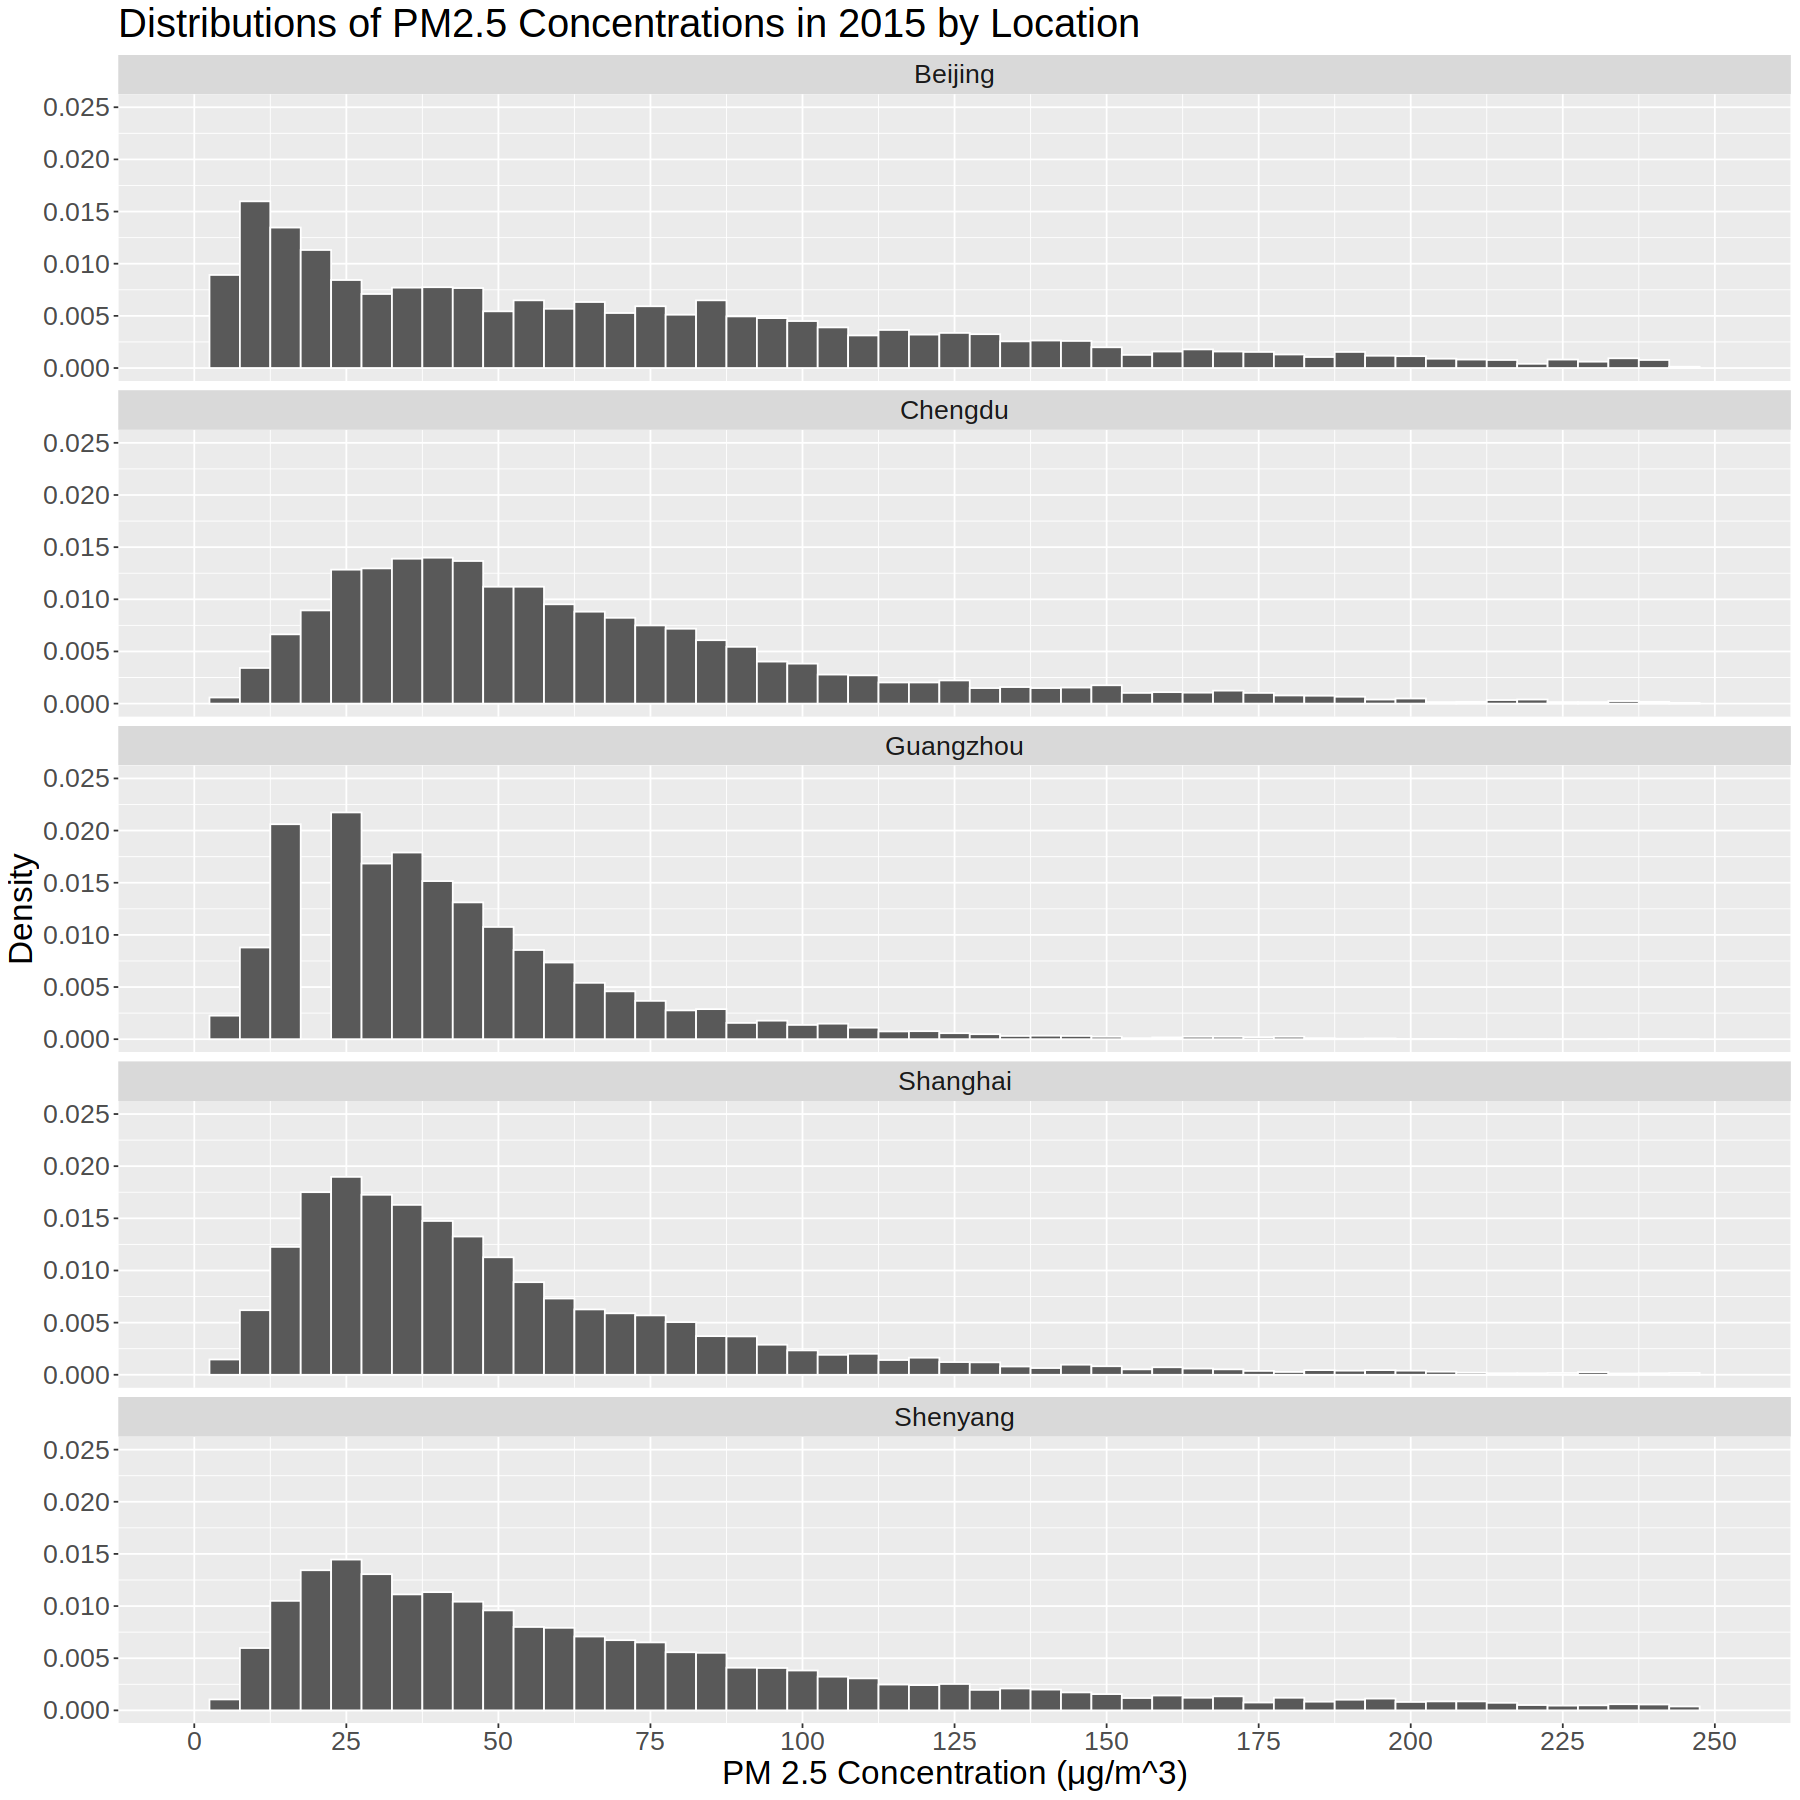

In [3]:
options(repr.plot.width = 15, repr.plot.height = 15)

# Distribution of PM 2.5 concentrations for each location in 2013 
dist_total_2013 <- total_PM2.5_AV %>% 
    # mutate(year = as.character(year(date))) %>%
    # mutate(year = as.character(year)) %>%
    # filter(year == "2013") %>% 
    filter(year == 2013) %>% 
    ggplot() + 
    geom_histogram(aes(x = PM_2.5_AV, y = ..density..), color = 'white', binwidth = 5) +
    labs(x = "PM 2.5 Concentration (μg/m^3)", y = "Density") + 
    facet_wrap(~location, scales="fixed", nrow = 5) +
    ggtitle("Distributions of PM2.5 Concentrations in 2013 by Location") + 
    theme(text = element_text(size = 20)) +
    scale_x_continuous(limits = c(0, 250), breaks = seq(0, 250, by = 25)) + 
    scale_y_continuous(limits = c(0, 0.025), breaks = seq(0, 0.025, by = 0.005))
dist_total_2013

# Distribution of PM 2.5 concentrations for each location in 2015 
dist_total_2015 <- total_PM2.5_AV %>% 
    # mutate(year = as.character(year(date))) %>%
    # mutate(year = as.character(year)) %>%
    # filter(year == "2015") %>% 
    filter(year == 2015) %>% 
    ggplot() + 
    geom_histogram(aes(x = PM_2.5_AV, y = ..density..), color = 'white', binwidth = 5) +
    labs(x = "PM 2.5 Concentration (μg/m^3)", y = "Density") + 
    facet_wrap(~location, scales="fixed", nrow = 5) +
    ggtitle("Distributions of PM2.5 Concentrations in 2015 by Location") + 
    theme(text = element_text(size = 20)) +
    scale_x_continuous(limits = c(0, 250), breaks = seq(0, 250, by = 25)) + 
    scale_y_continuous(limits = c(0, 0.025), breaks = seq(0, 0.025, by = 0.005))
dist_total_2015

#### 2.3.2. Boxplots of PM2.5 concentrations
- The boxplots below display the general information on the overall population.
- The majority of values do not exceed $150 \mu g/m^3$.
- The first boxplot has values above $500 \mu g/m^3$ removed for a clearer display of the boxplots. 
<!-- - There exist outlier values of up to $1150 \mu g/m^3$, with values above $500 \mu g/m^3$ removed for a clearer display of the boxplots. -->

Warning message:
“Removed 109 rows containing non-finite values (`stat_boxplot()`).”


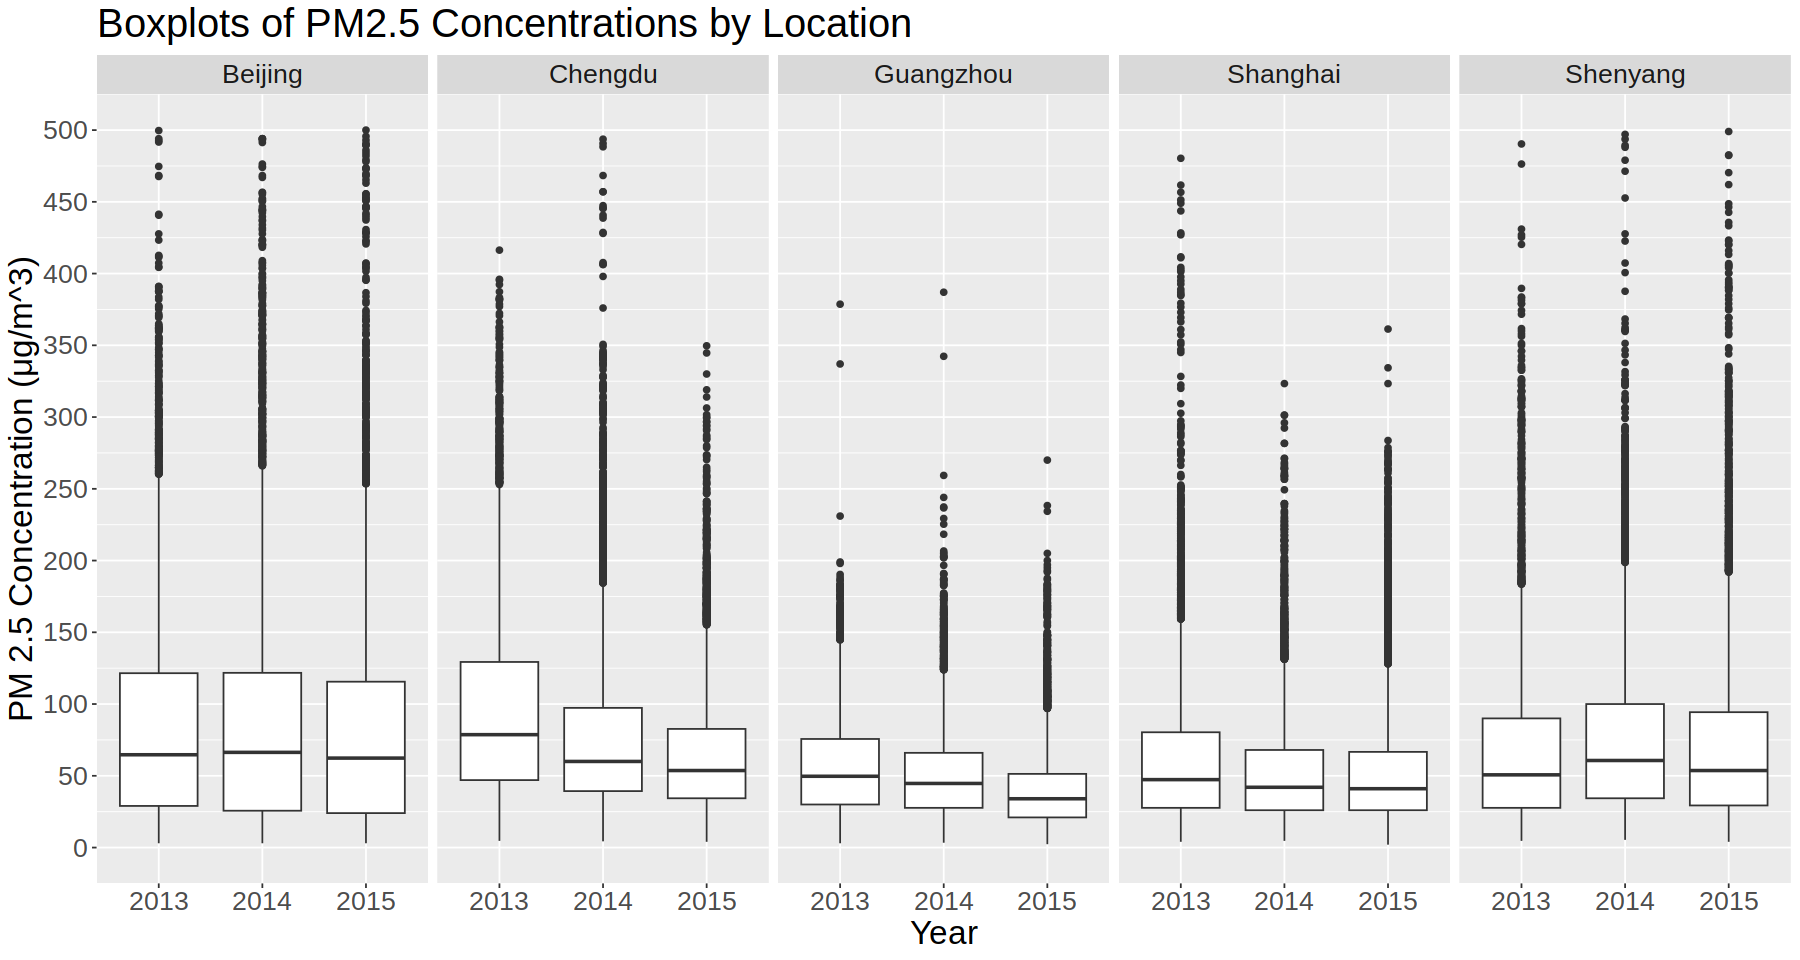

In [4]:
options(repr.plot.width = 15, repr.plot.height = 8)

# Boxplots of PM2.5 Concentrations by Location
box_total <- total_PM2.5_AV %>% 
    mutate(year = as.character(year)) %>%
    mutate(PM_2.5_AV_log = log(PM_2.5_AV)) %>%
    ggplot(aes(x = year, y = PM_2.5_AV)) + 
    geom_boxplot() + 
    labs(x = "Year", y = "PM 2.5 Concentration (μg/m^3)") + 
    facet_wrap(~location, scales="fixed", nrow = 1) +
    ggtitle("Boxplots of PM2.5 Concentrations by Location") + 
    theme(text = element_text(size = 20)) +
    scale_y_continuous(limits = c(0, 500), breaks = seq(0, 500, by = 50))
box_total

- Due to the data containing extreme outlier values of up to $1150 \mu g/m^3$, a separate boxplot set to a logarithmic scale of base $e$ is made to display the differences between groups.

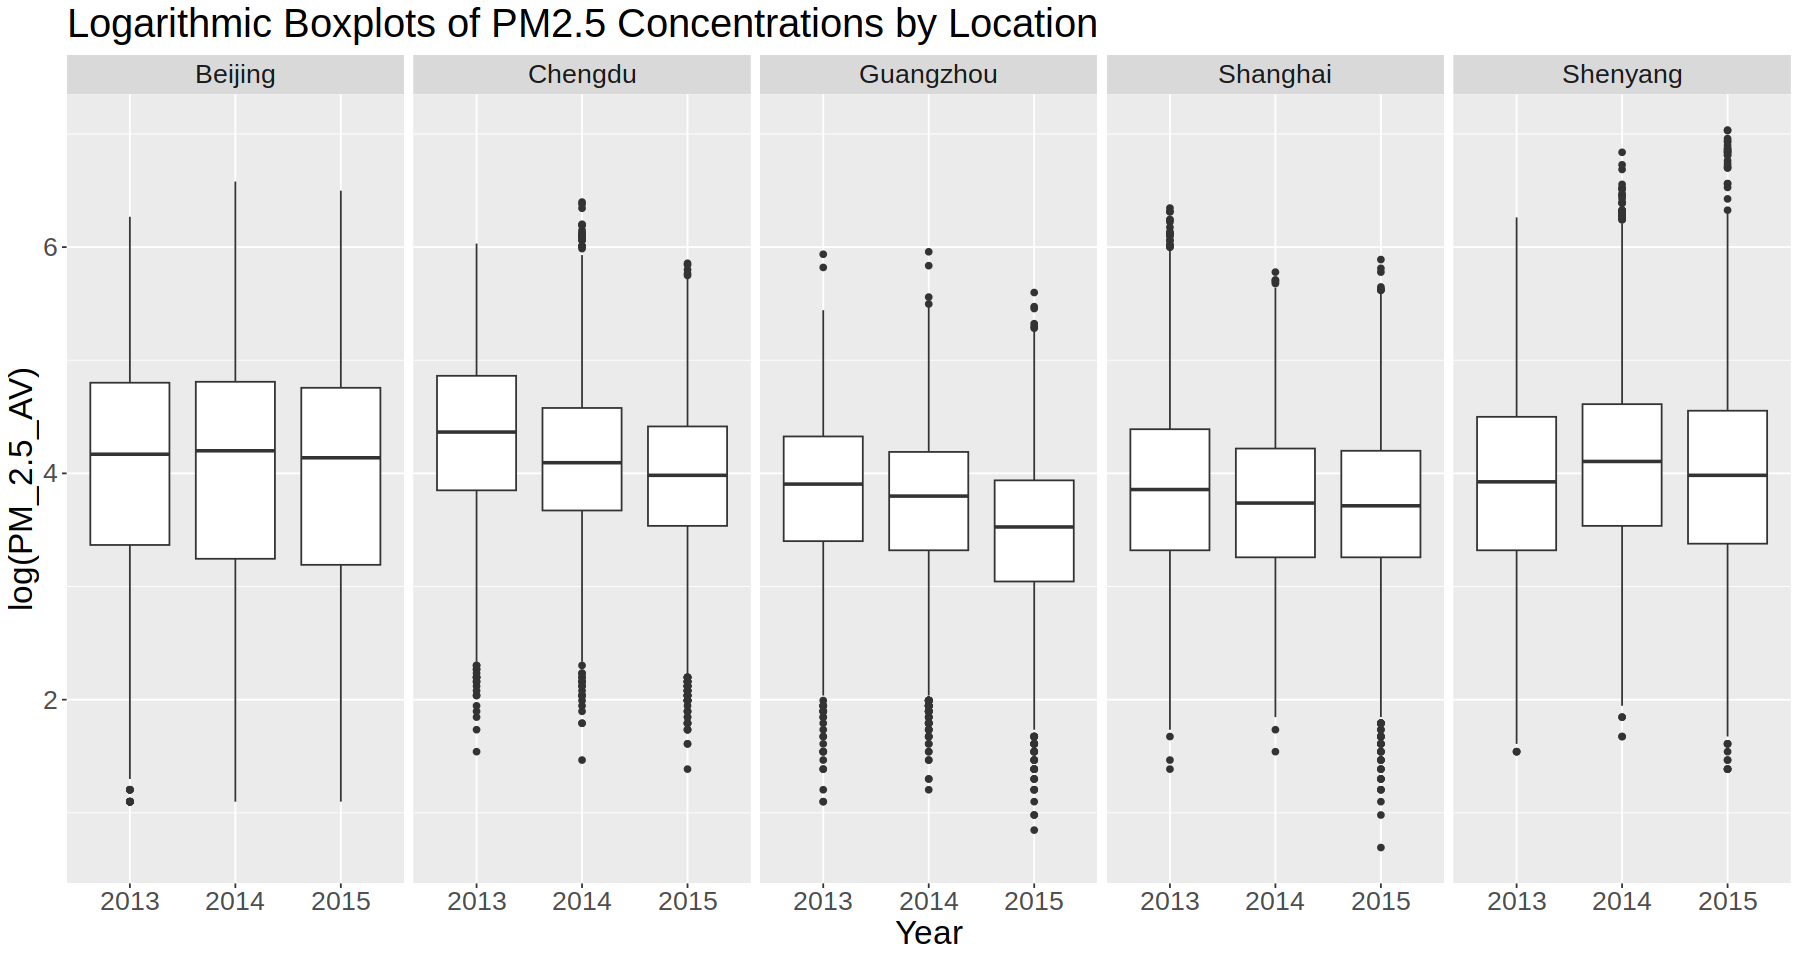

In [5]:
# Logarithmic Boxplots of PM2.5 Concentrations by Location
box_total_log <- total_PM2.5_AV %>% 
    mutate(year = as.character(year), PM_2.5_AV_log = log(PM_2.5_AV)) %>%
    ggplot(aes(x = year, y = PM_2.5_AV_log)) + 
    geom_boxplot() + 
    labs(x = "Year", y = "log(PM_2.5_AV)") + 
    facet_wrap(~location, scales="fixed", nrow = 1) +
    ggtitle("Logarithmic Boxplots of PM2.5 Concentrations by Location") + 
    theme(text = element_text(size = 20)) 
box_total_log

### 2.4. Data on overall population
The data below consists of summary data for the overall population: 
- `total_PM2.5_AV_pop_data`: For each location and each year between 2013 and 2015,
    - Mean of the PM2.5 concentration values (`PM2.5_mean`)
    - Standard deviation of the PM2.5 concentration values (`PM2.5_sd`)
    - Median of the PM2.5 concentration values (`PM2.5_median`)
    - Number of values (`n`)
- `total_PM2.5_AV_diff`: Differences in mean PM2.5 concentration between 2013 and 2015 as test statistics for hypothesis test 1 for each location.

In [8]:
# Count number of each combination of year and location
countChinaDates <- total_PM2.5_AV %>% 
    group_by(location, year) %>%
    tally() 

# Obtaining point estimates for each combination of location and year
total_PM2.5_AV_pop_data <- total_PM2.5_AV %>% 
    filter(year != 2014) %>% 
    group_by(location, year) %>% 
    summarize(
        PM2.5_mean = mean(PM_2.5_AV), 
        PM2.5_sd = sd(PM_2.5_AV), 
        PM2.5_median = median(PM_2.5_AV)
    ) %>% 
    inner_join(countChinaDates) 
# %>% 
#     pivot_wider(names_from = c(location, year), values_from = c(PM2.5_mean, PM2.5_sd, n))

# total_PM2.5_AV_pop_data <- total_PM2.5_AV %>% 
#     group_by(location, year) %>% 
#     summarize(PM2.5_mean = mean(PM_2.5_AV)) %>% 
#     inner_join(countChinaDates)
total_PM2.5_AV_pop_data

# Point estimates of differences in PM2.5 concentrations for each combination of location and year
total_PM2.5_AV_mean_diff <- tibble(
    BJ_PM2.5_mean_diff = total_PM2.5_AV_pop_data$PM2.5_mean[1] - total_PM2.5_AV_pop_data$PM2.5_mean[2], 
    CD_PM2.5_mean_diff = total_PM2.5_AV_pop_data$PM2.5_mean[3] - total_PM2.5_AV_pop_data$PM2.5_mean[4],
    GZ_PM2.5_mean_diff = total_PM2.5_AV_pop_data$PM2.5_mean[5] - total_PM2.5_AV_pop_data$PM2.5_mean[6],
    SH_PM2.5_mean_diff = total_PM2.5_AV_pop_data$PM2.5_mean[7] - total_PM2.5_AV_pop_data$PM2.5_mean[8],
    SY_PM2.5_mean_diff = total_PM2.5_AV_pop_data$PM2.5_mean[9] - total_PM2.5_AV_pop_data$PM2.5_mean[10],
)

total_PM2.5_AV_sd_diff <- tibble(
    BJ_PM2.5_sd_diff = total_PM2.5_AV_pop_data$PM2.5_sd[1] - total_PM2.5_AV_pop_data$PM2.5_sd[2], 
    CD_PM2.5_sd_diff = total_PM2.5_AV_pop_data$PM2.5_sd[3] - total_PM2.5_AV_pop_data$PM2.5_sd[4],
    GZ_PM2.5_sd_diff = total_PM2.5_AV_pop_data$PM2.5_sd[5] - total_PM2.5_AV_pop_data$PM2.5_sd[6],
    SH_PM2.5_sd_diff = total_PM2.5_AV_pop_data$PM2.5_sd[7] - total_PM2.5_AV_pop_data$PM2.5_sd[8],
    SY_PM2._sd5_diff = total_PM2.5_AV_pop_data$PM2.5_sd[9] - total_PM2.5_AV_pop_data$PM2.5_sd[10],
)

total_PM2.5_AV_mean_diff

total_PM2.5_AV_sd_diff

`summarise()` has grouped output by 'location'. You can override using the
`.groups` argument.
Joining, by = c("location", "year")


location,year,PM2.5_mean,PM2.5_sd,PM2.5_median,n
<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>
Beijing,2013,87.36825,77.58735,64.66667,6367
Beijing,2015,86.92798,87.29696,62.66667,5235
Chengdu,2013,98.31510,69.02849,78.66667,6032
Chengdu,2015,65.18370,44.51713,53.66667,8229
Guangzhou,2013,56.99301,35.61265,49.66667,3863
Guangzhou,2015,40.59729,27.67423,34.00000,8327
Shanghai,2013,63.99229,55.21316,47.33333,7309
Shanghai,2015,52.87839,40.83099,41.00000,8072
Shenyang,2013,70.33401,63.88846,50.66667,4439


BJ_PM2.5_mean_diff,CD_PM2.5_mean_diff,GZ_PM2.5_mean_diff,SH_PM2.5_mean_diff,SY_PM2.5_mean_diff
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4402683,33.1314,16.39572,11.11391,-6.349945


BJ_PM2.5_sd_diff,CD_PM2.5_sd_diff,GZ_PM2.5_sd_diff,SH_PM2.5_sd_diff,SY_PM2._sd5_diff
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-9.709605,24.51136,7.938422,14.38217,-15.88294


## 3. Methods: Plan

The dataset used in this report contains measurements for PM2.5 concentrations in specific places within each city and for each hour. This allows for potential variations in PM2.5 concentrations depending on location and time to be accounted for. This report provides information about the distribution of PM2.5 concentrations through histograms and boxplots, as well as test statistics for the differences in mean PM2.5 concentrations between 2013 and 2015 for each location, providing an idea of what difference measurements are to be expected. 

So far, we have examined the gross difference in air quality between 2013 and 2015 for 5 cities in China. Although this may give us an idea on how air quality has changed in these cities, we cannot know with our preliminary results if the calculated differences are statistically significant, and if we can reject the null hypothesis, increasing the risk of committing type I and II errors. For our results to be more trustworthy, the following would be implemented in future steps of this study: 
- Bootstrap sampling distributions of mean differences with central limit theorem
- Bootstrap sampling distributions of difference in standard deviations with central limit theorem
- Hypothesis tests with a 0.05 significance level 
- 95% confidence intervals by both bootstrapping and by central limit theorem 
- Null model formed using test statistics 

As a result of the policy intervention of the 2013-2017 Clear Air Action Plan, we anticipate a substantial improvement in the air quality of at least three out of the five cities in our study (i.e., a majority of the cities). This improvement would be reflected in a significant reduction in PM2.5 levels, indicating that the policy has effectively addressed the air quality issues in these cities. Such an outcome would have far-reaching implications for public health and environmental sustainability in the region, as it would indicate that targeted policy interventions can indeed make a significant impact in mitigating air pollution.

Our study aims to provide a comprehensive understanding of the real-life impacts of air quality policies. If our null hypothesis ($\mu_{2013} = \mu_{2015}$) is not rejected, our findings could serve as a wake-up call for policymakers to develop more effective policies to address the critical issue of air quality in China. By highlighting the severe health and environmental consequences of poor air quality, such as increased respiratory illnesses, environmental damage, economic costs, and social inequality, our study can drive the development of more targeted and effective policies to improve air quality. 

Our research findings hold significant implications for several critical areas such as public health and the environment. Our study has the potential to address key questions that could help shape future policy decisions. These questions include:
- How can policymakers create more effective policies to improve air quality in China?
- What are the reasons for the inefficacy of current policies aimed at improving air quality in China?
- In what ways can policymakers continue to improve air quality, given the success or failure of current policies?
- Can the policies implemented in China be scaled and replicated in other cities or countries?

By addressing these crucial questions, our study could guide policymakers to design and implement effective strategies to tackle air pollution and its impacts, not just in China but across the globe.

### 3.1. Bootstrap Sampling Distribution vs Central Limit Theorem (CLT) for Mean differences
- Bootstrap sampling distribution of mean differences is obtained by using `infer` package.
    - The original sample is used as an estimate of the overall population. 
    - Bootstrap samples are created by sampling from the original sample with replacement.
        - Each bootstrap sample is equal to the original sample size.
    - Bootstrapping is repeated a 1000 times to obtain 1000 separate bootstrap samples. 
    - The point estimate (Sample mean) is calculated for each replicated bootstrap sample to obtain a bootstrap sampling distribution of the estimate.
- Bootstrapping of mean differences is applied separately for each location.
- 

### 3.2. Bootstrap Sampling Distribution vs Central Limit Theorem (CLT) for differences in Standard Deviation
- The same methods from section 3.1 are applied, with the test statistic instead being the difference in standard deviations. 

## References

<!-- - Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220â€“10236 doi:10.1002/2016JD024877 -->
- Liang, X. (2016). PM 2.5 data reliability, consistency, and air quality assessment in five chinese cities CONSISTENCY IN CHINA'S PM 2.5 DATA doi:10.1002/2016JD024877
- “California Air Resources Board.” Inhalable Particulate Matter and Health (PM2.5 and PM10) | California Air Resources Board, https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health#:~:text=For%20PM2.,symptoms%2C%20and%20restricted%20activity%20days.
- Andrews-Speed, P., Shobert., B. A., Zhidong, L., &amp; Herberg, M. E. (2015). China's energy crossroads: Forging a new energy and environmental balance. Project Muse. 